# Correlating Stocks Using Heatmap

In [51]:
%pwd

'/Users/harrybarber/Desktop/DSC478/Assignment3/PROGRAMMING MACHINE LEARNING A - 2021-2022 Winter - 2142022 - 510 PM'

In [1]:
 import numpy as np
 import pandas as pd
 import pandas_datareader as web
 from datetime import datetime
 import matplotlib.pyplot as plt
 import seaborn

In [2]:
# select start date for correlation window as well as list of tickers
start = datetime(2017, 1, 1)
symbols_list = ['SPY', 'XLB', 'XLC', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLRE', 'XLU', 'XLV', 'XLY']

In [3]:
#array to store prices
symbols=[]

In [4]:
#pull price using iex for each symbol in list defined above
for ticker in symbols_list: 
    r = web.DataReader(ticker, 'yahoo', start)
    # add a symbol column
    r['Symbol'] = ticker 
    symbols.append(r)

In [5]:
# concatenate into df
df = pd.concat(symbols)
df = df.reset_index()
df = df[['Date', 'Close', 'Symbol']]
df.head()

,Date,Close,Symbol
0,2017-01-03,225.240005,SPY
1,2017-01-04,226.580002,SPY
2,2017-01-05,226.399994,SPY
3,2017-01-06,227.210007,SPY
4,2017-01-09,226.460007,SPY


In [7]:
# pivot to have stocks represented as columns
df_pivot = df.pivot('Date','Symbol','Close').reset_index()
df_pivot.head()

Symbol,Date,SPY,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
0,2017-01-03,225.240005,49.990002,NaN,76.169998,23.510000,62.590000,48.790001,51.900002,30.850000,48.450001,69.839996,81.879997
1,2017-01-04,226.580002,50.720001,NaN,76.010002,23.700001,62.959999,48.959999,51.900002,31.240000,48.630001,70.389999,82.970001
2,2017-01-05,226.399994,50.570000,NaN,75.820000,23.459999,62.779999,49.040001,52.070000,31.400000,48.680000,70.750000,82.910004
3,2017-01-06,227.210007,50.619999,NaN,75.889999,23.540001,63.139999,49.400002,52.119999,31.400000,48.830002,70.949997,83.320000
4,2017-01-09,226.460007,50.610001,NaN,74.790001,23.379999,62.650002,49.389999,51.700001,31.200001,48.189999,71.250000,83.250000


In [49]:
corr_df = df_pivot.corr(method='pearson')
corr_df.head().reset_index()
corr_df.head(10)

Symbol,SPY,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
Symbol,,,,,,,,,,,,
SPY,1.000000,0.954576,0.974372,-0.418577,0.887659,0.949304,0.987083,0.946046,0.917348,0.842207,0.985846,0.990747
XLB,0.954576,1.000000,0.960783,-0.240166,0.929023,0.973107,0.916998,0.889682,0.854800,0.722694,0.911673,0.932603
XLC,0.974372,0.960783,1.000000,-0.258725,0.847122,0.925213,0.963783,0.909823,0.829112,0.735698,0.960567,0.965907
XLE,-0.418577,-0.240166,-0.258725,1.000000,0.003280,-0.185481,-0.538403,-0.495937,-0.289717,-0.519406,-0.494219,-0.469577
XLF,0.887659,0.929023,0.847122,0.003280,1.000000,0.961573,0.809362,0.802348,0.870703,0.694138,0.834022,0.840533
XLI,0.949304,0.973107,0.925213,-0.185481,0.961573,1.000000,0.892476,0.878689,0.888315,0.772145,0.905381,0.922835
XLK,0.987083,0.916998,0.963783,-0.538403,0.809362,0.892476,1.000000,0.944024,0.880488,0.835615,0.984089,0.988558
XLP,0.946046,0.889682,0.909823,-0.495937,0.802348,0.878689,0.944024,1.000000,0.913809,0.900410,0.936656,0.932267
XLRE,0.917348,0.854800,0.829112,-0.289717,0.870703,0.888315,0.880488,0.913809,1.000000,0.905334,0.897122,0.890213


Visualize the results by plotting a heatmap of the correlations (with Seaborn and Matplotlib)

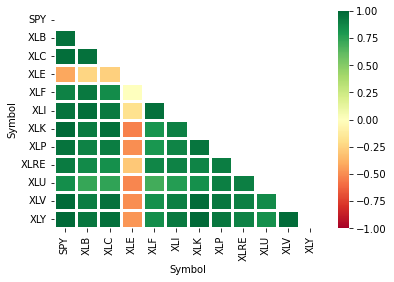

In [50]:
#take the bottom triangle since it repeats itself
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
#generate plot
seaborn.heatmap(corr_df, cmap='RdYlGn', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2.5)
plt.yticks(rotation=0) 
plt.xticks(rotation=90) 
plt.show()

In [ ]:
SPY is higly correlated to the other ETFs, with XLE as an exception